## Q9 : Investigating the Data

In [56]:
import unicodecsv

#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# 3 table
enrollments = read_csv('../data/enrollments.csv')
daily_engagement = read_csv('../data/daily_engagement.csv')
project_submissions = read_csv('../data/project_submissions.csv')
    
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

enrollment_num_rows = len(enrollments) 
enrollment_num_id = []
for enr in enrollments:
    enrollment_num_id.append(enr['account_key']) 

enrollment_num_unique_students = len(set(enrollment_num_id))
print(enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)  
engagement_num_id = []
for engage in daily_engagement:
    engagement_num_id.append(engage['acct']) 

engagement_num_unique_students = len(set(engagement_num_id))
print(engagement_num_unique_students)

submission_num_rows = len(project_submissions)
submission_num_id = []
for proj in project_submissions:
    submission_num_id.append(proj['account_key']) 

submission_num_unique_students = len(set(submission_num_id))
print(submission_num_unique_students)


1302
1237
743


จะเห็นว่า Enrollment > Engagement > Submission

## เฉลย

ในส่วนของ for loop ที่สร้าง list ที่ค่าข้างใน unique ใช้ code แบบนี้สวยและสั้นกว่า

In [57]:
submission_num_unique_students = set()
for submission in project_submissions:
    submission_num_unique_students.add(submission['account_key'])
len(submission_num_unique_students)

743

## Q10 : Problem in the Data

In [58]:
import unicodecsv

#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

new_daily_engagement = read_csv('../data/daily_engagement.csv')

for data in new_daily_engagement: 
    # add 'account_key' key to this row     
    data['account_key'] = data['acct']
    # remove 'acct' key to this row     
    del data['acct']

daily_engagement = new_daily_engagement
# print(new_daily_engagement[0])
print(daily_engagement[0]['account_key'])

0


จากข้อนี้ ควรเปลี่ยน code for ใน Q3 เป็น function แล้วเรียกใช้ จะ clean กว่านะ

## Q11 : Missing Engagement Records

### Investigate 1st Problem (ที่เห็นจากข้อที่แล้ว)

** ทำไม student ที่ enrollment บางคน ถึงไม่มีข้อมูลใน daily_engagement table? **
1. ระบุหาจุดที่ข้อมูล surprise !! (ไม่ได้คาดการณ์ไว้)
    - enrollment record ไหนที่ไม่เกี่ยวข้องกับข้อมูล engagement
2. แสดงข้อมูลที่ surprise(แปลกๆ ไม่เหมือนตัวอื่น และจะทำให้การทดลองคลาดเคลื่อน) สัก 1 ชุด หรือบางส่วน เล็กน้อย ให้เห็น pattern


In [59]:
import unicodecsv
import pandas as pd

#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# make array is contain student unique id ***require table has key "account_key"
def unique_stu_id(table):
    table_id = []
    for data in table:
        table_id.append(data['account_key'])
    return set(table_id)
    
# 3 table
enrollments = read_csv('../data/enrollments.csv')
daily_engagement = read_csv('../data/daily_engagement.csv')
project_submissions = read_csv('../data/project_submissions.csv')

# fix daily engagement table 'acct' to 'account_key'
for engage in daily_engagement:
    engage['account_key'] = engage['acct']
    del engage['acct']

# Enrollment
enrollment_unique_stu_id = unique_stu_id(enrollments)

# Engagement
engagement_unique_stu_id = unique_stu_id(daily_engagement)

student_not_engage_id = enrollment_unique_stu_id - engagement_unique_stu_id;
student_not_engage_table = [];
for enrol in enrollments: 
#     student_id = enrol['account_key']
#     if student_id not in engagement_unique_stu_id:
#         print(enrol)
#         break
    if enrol['account_key'] in student_not_engage_id:
        student_not_engage_table.append(enrol)

# pd.DataFrame(student_not_engage_table)
print(student_not_engage_table[56])

OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', '2015-02-25'), ('cancel_date', ''), ('days_to_cancel', ''), ('is_udacity', 'True'), ('is_canceled', 'False')])


## Q12 : Checking For More Problem Records

### Investigating Data Problems (วิธีการสำรวจหาปัญหาของ Data)
1. Identify surprising data points
2. Print Out one or a few surprising point
3. Fix any problems youfind

**คำถามคือ จำนวนข้อมูล enrollment ที่ไม่มี engagement และมีเวลาก่อน cancel อย่างน้อย 1 วัน?**

In [60]:
import unicodecsv
import pandas as pd

#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# make array is contain student unique id ***require table has key "account_key"
def unique_stu_id(table):
    table_id = []
    for data in table:
        table_id.append(data['account_key'])
    return set(table_id)
    
# 3 table
enrollments = read_csv('../data/enrollments.csv')
daily_engagement = read_csv('../data/daily_engagement.csv')
project_submissions = read_csv('../data/project_submissions.csv')

# fix daily engagement table 'acct' to 'account_key'
for engage in daily_engagement:
    engage['account_key'] = engage['acct']
    del engage['acct']

# Enrollment
enrollment_unique_stu_id = unique_stu_id(enrollments)

# Engagement
engagement_unique_stu_id = unique_stu_id(daily_engagement)

student_not_engage_id = enrollment_unique_stu_id - engagement_unique_stu_id;
student_not_engage_table = [];
for enrol in enrollments: 
    if enrol['account_key'] in student_not_engage_id and enrol['days_to_cancel'] != '0':
        student_not_engage_table.append(enrol)

pd.DataFrame(student_not_engage_table)

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,1304,canceled,2015-01-10,2015-03-10,59,True,True
1,1304,canceled,2015-03-10,2015-06-17,99,True,True
2,1101,current,2015-02-25,,,True,False


## 13 : Tracking Down The Remaining Problems

จากที่เห็นในข้อ 12 จะเห็นว่าทั้ง 3 คน is_udacity = True 
ซึ่งถ้าถามทีม Data ของ udacity แล้วจะได้ความว่า is_udacity = True คือ account test ต้องกรองออก

**ทำ Filter กรอง account test ออก**

In [61]:
import unicodecsv
import pandas as pd

#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# make array is contain student unique id ***require table has key "account_key"
def unique_stu_id(table):
    table_id = []
    for data in table:
        table_id.append(data['account_key'])
    return set(table_id)

# make array is contain udacity test unique id ***require table has key "account_key"
def test_accounts_id(table):
    table_id = []
    for data in table:
        if data['is_udacity'] == 'True':
            table_id.append(data['account_key'])
    return set(table_id)

def non_udacity_account(data,test):
    non_test = []
    for x in data:
        if x['account_key'] not in test:
            non_test.append(x)
    return non_test
    
    
# 3 table
enrollments = read_csv('../data/enrollments.csv') #1640
daily_engagement = read_csv('../data/daily_engagement.csv') #136240
project_submissions = read_csv('../data/project_submissions.csv') #3642
# test students id   
enroll_test      = test_accounts_id(enrollments) #6
enrollments      = non_udacity_account(enrollments,enroll_test)

# fix daily engagement table 'acct' to 'account_key'
for engage in daily_engagement:
    engage['account_key'] = engage['acct']
    del engage['acct']

# Enrollment
enrollment_unique_stu_id = unique_stu_id(enrollments)
print(len(enrollment_unique_stu_id))

# Engagement
engagement_unique_stu_id = unique_stu_id(daily_engagement)
student_not_engage_id = enrollment_unique_stu_id - engagement_unique_stu_id;
student_not_engage_table = [];
for enrol in enrollments: 
    if enrol['account_key'] in student_not_engage_id and enrol['days_to_cancel'] != '0':
        student_not_engage_table.append(enrol)

pd.DataFrame(student_not_engage_table)

1296


""


## Q14 : Refining The Question (ขัดเกลาคำถาม)

ณ จุดนี้เราจะย้ายจาก Wrangling Phase มาอยู่ที่ Explore Phase

หลังจากกรองข้อมูลขยะออกไปแล้ว ก็มาตั้งคำถามกับข้อมูลกัน ให้ลึกขึ้นๆ เช่น
1. ความแตกต่างของจำนวนการเข้าเรียนในตาราง daily_engagement ของคนที่ผ่านกับไม่ผ่านโปรเจคแรก

จากคำถามนี้ เมื่อพิจารณา daily_engagement จะมีปัญหาคือ
1. This will include data from after project submission
2. This compress data from different leght of time
3. Include engagement of course not related to the first project.

ดังนั้นจึงปรับคำถามใหม่หน่อย
**Revision(ปรับปรุงใหม่)**

** Get start **
1. สร้าง dict ของ student ที่มีคุณสมบัติ อย่างใดอย่างหนึ่งนี้
    * ยังไม่ cancel
    * วันที่ enroll ทั้งหมดมากกว่า 7 วัน

Key : account_key, Values : enrollment_date
NameDict : paid_students


In [62]:
enrollments = read_csv('../data/enrollments.csv') #1640

# remove test
enroll_test      = test_accounts_id(enrollments) #6
enrollments      = non_udacity_account(enrollments,enroll_test)

# unique student enroll id (1296)
unique_stu_enrollment_id = unique_stu_id(enrollments)

# unique enroll (1622) 
for enrol in enrollments: 
    if enrol['account_key'] not in unique_stu_enrollment_id:
        del enrol         

# paid students [one key(id) per one value]
paid_students = {}
for enroll in enrollments: 
    if not enroll['days_to_cancel'] or int(enroll['days_to_cancel']) > 7:
        if enroll['account_key'] not in paid_students or enroll['join_date'] > paid_students[enroll['account_key']]:
            paid_students[enroll['account_key']] = enroll['join_date']

print(len(paid_students))

995


## Q15 : Getting Data From First Week

ต่อจากข้อ 14 ต้องพิจารณาตาราง daily_engagement เพิ่ม โดยเอาเฉพาะข้อมูลของ paid student(จากข้อที่แล้ว) และพิจารณาเฉพาะ engagement ใน first week

In [63]:
# Variable
# - paid_students
# - daily_engagement
#------------------------------
from datetime import datetime

def remove_free_trial_cancels(data):
    new_data = []
    for dp in data:
        if dp['account_key'] in paid_students:
            new_data.append(dp)
    return new_data
    

def within_one_week(join_date,engagement_date):
    date_format = "%Y-%m-%d"
    delta_time  = datetime.strptime(engagement_date, date_format) - datetime.strptime(join_date, date_format)
    return delta_time.days < 7 and delta_time.days >= 0

# Paid_engagement
paid_engagement = remove_free_trial_cancels(daily_engagement)

# Paid_engagement in 1st week
paid_engagement_in_first_week = []
for engagement in paid_engagement:
    if within_one_week(paid_students[engagement['account_key']],engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement) 

print(len(paid_engagement_in_first_week))

6919


## 17 : Exploring Student Engagement

group ข้อมูล engagement เป็นของแต่ละคน แล้วพิจาณาเวลาเรียนทั้งหมดของแต่ละคน และเวลาเรียนเฉลี่ยของคอร์ส


Populating the interactive namespace from numpy and matplotlib
MEAN : 306.708326753
SD : 412.996933409
MIN : 0.0
MAX : 3564.7332645


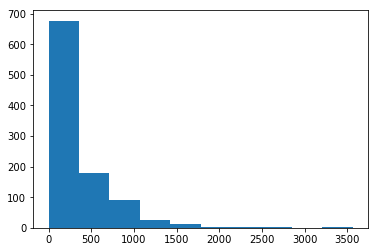

In [210]:
# Variable
# - paid_engagement_in_first_week
#------------------------------
%pylab inline
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


def group_data(data, keyname):
    group_by_keyname = defaultdict(list)
    for data_point in data:
        key = data_point[keyname]
        group_by_keyname[key].append(data_point) 
    return group_by_keyname

def sum_grouped_items(grouped_data, field_name):    
    total_value = {}
    for key, values in grouped_data.items():
        total = 0
        for value in values:
            total += float(value[field_name])
        total_value[key] = total
    return total_value

def describe_data(data):    
    total_values = list(data.values())
    print("MEAN :", np.mean(total_values))
    print("SD :", np.std(total_values))
    print("MIN :", np.min(total_values))
    print("MAX :", np.max(total_values))
    plt.hist(list(data.values()))

# Engagement in 1st week group by 'account_key'
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

# Total minute by account
total_minute_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

# Describe
describe_data(total_minute_by_account)

# pandas print table series
# pd.Series(total_minute_by_account)

## Q18 : Debugging Data Analysis Code

 debug data analysis code 
 
 STEP : 
 1. Identify surprising data point
 2. Print out one or a few surprising points
 3. Fix any problem you find
 
 จากข้อ 17 
 จะเห็นว่าที่ MAX Time ต้องเรียนวันละ 25 hr (ใน 7 วัน) ถึงจะเรียนได้แบบนั้น แม่งมีไรแปลกๆละ
 ดู engagement ของคนที่ได้ Max สักหน่อยน่าจะดี

จะเห็นว่าเวลา "utc_date" แม่งกินช่วงหลายเดือนมาก แสดงว่า function within_one_week นี่น่าจะผิด เดาคือเพราะแม่งนับ engagement ของ enrollment แรกๆที่เคยเข้าเรียนแล้ว cancel ด้วย 

## Q19: Lessons Completed In First Week

เปลี่ยนจาก minute เป็น lesson

MEAN : 1.63618090452
SD : 3.00256129983
MIN : 0.0
MAX : 36.0


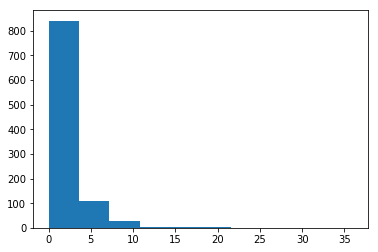

In [211]:
# Variable
# - engagement_by_account

total_lesson_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(total_lesson_by_account)

## Q20 : Number Of Visits In The First Week

นับจำนวนวันที่เข้าเรียนของแต่ละคนในอาทิตย์แรก


MEAN : 2.86733668342
SD : 2.25519800292
MIN : 0
MAX : 7


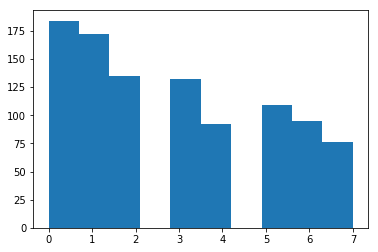

In [212]:
# Variable
# - engagement_by_account

def total_has_visited(grouped_data, field_name):    
    total_value = {}
    for key, values in grouped_data.items():
        total = 0
        for value in values:
            has_visited = 1 if float(value[field_name]) > 0 else 0
            total += has_visited
        total_value[key] = total
    return total_value

total_has_visited_in_one_week = total_has_visited(engagement_by_account,'num_courses_visited')
describe_data(total_has_visited_in_one_week)

## Q21 : Splitting Out Passing Students
split the paid engagement data into two lists:
* Records for students who pass the subway project at some point (name this variable **passing_engagement**)
* Records for students who do not (name this variable **non_passing_engagement**)

หาคนที่ผ่านโปรเจคแรก 
แต่มีปัญหานิดหน่อยคือ ข้อมูลโปรเจคแรกนั้นมี 2 id (เปลี่ยน id ระหว่างทาง run ระบบ) ตามที่โจทย์ให้มา ข้างล่าง

In [213]:
# Variable
# - paid_engagement_in_first_week
# - project_submissions
import pandas as pd
import numpy as np

# id ของ project 1 ทั้งหมด
subway_project_lesson_keys = ['746169184','3176718735'] 

# พิจารณาเฉพาะ Paid Submission ไม่เอาค่า Test
paid_submissions = remove_free_trial_cancels(project_submissions)

# จาก paid submission ทั้งหมด 
# - เอาแค่ submission ของ 1st Project
# - หา account id ทั้งหมดที่ส่ง project 1
# - account id ทั้งหมดที่ผ่าน project 1
all_account_key = set()
passing_account_key = set()
for project in paid_submissions:
    if (project['lesson_key'] in subway_project_lesson_keys):
        all_account_key.add(project['account_key'])
        if (project['assigned_rating'] == 'PASSED' or project['assigned_rating'] == 'DISTINCTION'):
            passing_account_key.add(project['account_key'])

non_passing_account_key = all_account_key - passing_account_key
print("Passing Account(1st Project) :",len(passing_account_key))
print("None Passing Account(1st Project) :",len(non_passing_account_key))

# หาดูว่าใน paid_engagement_in_first_week อันไหนอยู่กลุ่มคนผ่าน อันไหนอยู่กลุ่มคนไม่ผ่าน 
passing_engagement = []
non_passing_engagement = []
for engagement in paid_engagement_in_first_week:
    if (engagement['account_key'] in passing_account_key):
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print("Passing Engagement(1st Project) :",len(passing_engagement))
print("Non Passing Engagement(1st Project) :",len(non_passing_engagement))

Passing Account(1st Project) : 647
None Passing Account(1st Project) : 33
Passing Engagement(1st Project) : 4527
Non Passing Engagement(1st Project) : 2392


## Q22 : Comparing Students who Pass to Those Who Don't

หา metric ที่น่าสนใจใช้วัด 
ก่อนนี้เราเคยดูกับ 
- minutes spent
- lessons completed
- days visited
- other

=======MINUTE SPENT=======
-------Passing-------
MEAN : 394.586046484
SD : 448.499519327
MIN : 0.0
MAX : 3564.7332645
----None Passing----
MEAN : 143.326474267
SD : 269.538619011
MIN : 0.0
MAX : 1768.52274933


=======LESSONS COMPLETED=======
-------Passing-------
MEAN : 2.05255023184
SD : 3.14222705558
MIN : 0.0
MAX : 36.0
----None Passing----
MEAN : 0.862068965517
SD : 2.54915994183
MIN : 0.0
MAX : 27.0


=======DAYS VISITED=======
-------Passing-------
MEAN : 3.38485316847
SD : 2.25882147092
MIN : 0
MAX : 7
----None Passing----
MEAN : 1.90517241379
SD : 1.90573144136
MIN : 0
MAX : 7


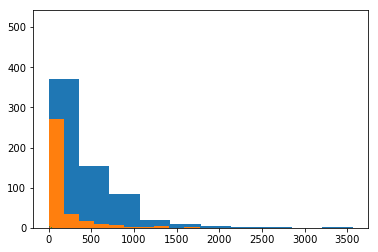

In [214]:
# ------------- 22 ---------------
# Variable
# - all_account_key
# - passing_account_key
# - passing_engagement
# - non_passing_engagement

# Group Data by Account
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

# Minutes Spent
passing_total_minute_by_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
print('=======MINUTE SPENT=======')
print('-------Passing-------')
describe_data(passing_total_minute_by_account)
non_passing_total_minute_by_account = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
print('----None Passing----')
describe_data(non_passing_total_minute_by_account)

# Lesson Complete
passing_total_lesson_by_account = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
print('\n')
print('=======LESSONS COMPLETED=======')
print('-------Passing-------')
describe_data(passing_total_lesson_by_account)
non_passing_total_lesson_by_account = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
print('----None Passing----')
describe_data(non_passing_total_lesson_by_account)

# Days Visited
print('\n')
print('=======DAYS VISITED=======')
print('-------Passing-------')
passing_total_days_by_account = total_has_visited(passing_engagement_by_account,'num_courses_visited')
describe_data(passing_total_days_by_account)
non_passing_total_days_by_account = total_has_visited(non_passing_engagement_by_account, 'num_courses_visited')
print('----None Passing----')
describe_data(non_passing_total_days_by_account)

จากข้างบนถ้าให้เลือกปริมาณสักอย่างที่จะใช้แยกประเภทคนผ่าน/ไม่ผ่าน น่าจะเลือก minute ดีสุดเพราะค่าเฉลี่ยต่างกันมากเกิน 2 เท่า แล้วก็ดู make sense ในโลกความจริงด้วย


## Q23 : Making Histograms
หลังจากเรารู้ค่าสถิติเบื้องต้นไปแล้ว สิ่งที่น่าสนใจอีกอย่างคือ จำนวนความถี่ของแต่ละค่า แสดงออกมาเป็น visualize จะเข้าใจง่ายกว่า

#### Lib
* matplotlib

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

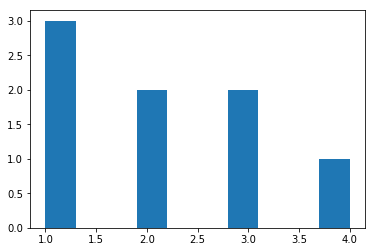

In [215]:
import matplotlib.pyplot as plt

data = [1, 2, 1, 3, 3, 1, 4, 2]

# Plot Histograms
plt.hist(data)

นำมาลองกับข้อมูลนักเรียนที่ ผ่าน/ไม่ผ่าน

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

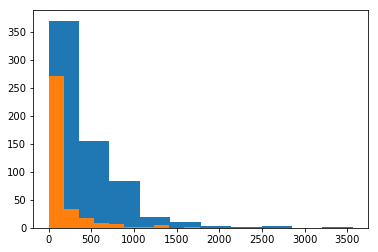

In [216]:
# ------------- 23.1 ---------------
# Variable
# - passing_total_minute_by_account
# - non_passing_total_minute_by_account

# 
# เอาเฉพาะค่า Values ใช้ list(d.values())
# 

# Minutes Spent
plt.hist(list(passing_total_minute_by_account.values()))
plt.hist(list(non_passing_total_minute_by_account.values()))

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

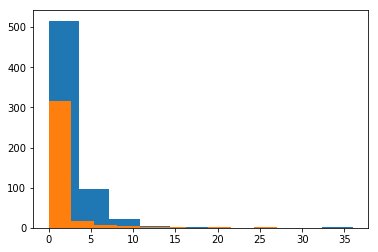

In [217]:
# ------------- 23.2 ---------------
# Variable
# - passing_total_lesson_by_account
# - non_passing_total_lesson_by_account

# Lesson Complete
plt.hist(list(passing_total_lesson_by_account.values()))
plt.hist(list(non_passing_total_lesson_by_account.values()))


(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

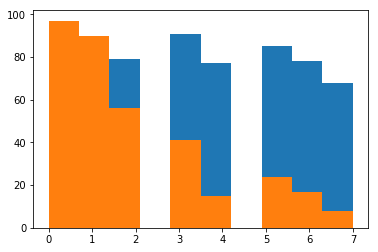

In [218]:
# ------------- 23.3 ---------------
# Variable
# - passing_total_days_by_account
# - non_passing_total_days_by_account

# Days Visited
plt.hist(list(passing_total_days_by_account.values()))
plt.hist(list(non_passing_total_days_by_account.values()))

## Q24 : Are you results just noise?

มาถึงจุดนี้เราน่าจะได้ข้อสรุปแล้ว (ถ้าคิดว่าผลของเราไม่มี noise อะไรแล้วนะ)

#### Process ข้อ 4
* Conclution
* or Prediction

อย่าง Project นี้เราอาจจะสรุปอย่างหยาบๆว่า

**Students who pass the subway project spend more minute in the classroom during their first week.**

แต่นี่คือความต่างจริงๆหรือเป็นผลที่มาจาก noise ใน data?

อย่างไรก็ตามบางปริมาณอาจจะไม่มีความต่่างระหว่างคนผ่านกับไม่ผ่าน (ทั้งๆที่เราหวังไว้ว่าค่าทั้งสองต้องต่างกัน)

เราสามารถบอกได้อย่างไรว่าสิ่งที่เราเห็นมันคือ true difference จริงๆ หรือเกิดมาจาก noise ของ data

ในโปรเจคนี้ความแตกต่างที่เราเห็นมันชัดเจน(make sense) อาจจะยากสักหน่อยถ้าจะคิดว่าความต่างนี้มันเกิดมาจาก noise

แต่เราก็ไม่สามารถใช้ sense ได้กับทุกสถานการณ์

**ถ้าอยาก check อย่างจริงจัง เราควรลองผลลัพท์ โดยการ random สถานการณ์ดูหลายๆแบบ ว่ายังให้ผลเหมือนเดิมไหม? ดังนั้นต้องใช้ statistics **

แน่นอนโปรเจคนี้จะไม่ลงลึก stat แต่ระลึกไว้เสมอว่า ผลลัพธ์ที่เราสรุปได้ตอนนี้เป็นแค่ **ข้อสรุปเบื้องต้น ที่ไม่มีการ validate ใดๆทั้งสิ้น**

## Q25 : Correlation Does not Imply Causation

ถ้า A และ B มีความสัมพันธ์ (Correlation) ต่อกันหมายความว่าถ้าเราเปลี่ยนค่า A ค่า B จะเปลี่ยนด้วย

เมื่อ

"นักเรียนที่ผ่านโปรเจคแรกคือคนที่เข้าเรียนหลายหลังในสัปดาห์แรก" > *Correlation(ความสัมพันธ์)ได้จาก Data*

ดังนั้นอาจจะบอกได้ว่า

**จำนวนการเข้าเรียนในสัปดาห์แรกส่งผลต่อการผ่านโปรเจค** > *Causation(สาเหตุ)*

จากข้อสรุปข้างบน ถ้าเราอยากให้คนผ่านเพิ่มมากขึ้นอาจจะทำได้โดยการส่งเมลแจ้งเตือนนักเรียนไม่ให้ลืมเข้ามาเรียน

แม้ว่าข้อสรุปนี้ดูจะเป็นไปได้ **แต่!** จริงๆแล้วเราไม่สามารถสรุปได้ชัวๆจากข้อมูลแค่นี้ เพราะบางทีอาจมีตัวแปรอื่นซ่อนอยู่ที่ส่งผลต่อสองตัวแปรนี้นี้ทั้งคู่ ไม่ใช่ว่าสองตัวแปรนี้มี correlation กัน

ตัวอย่างที่บอก : http://tylervigen.com/spurious-correlations

Third factors ที่อาจจะส่งผลต่อ จำนวนเข้าเรียน และ การผ่านโปรเจค

* Level of interest (ระดับความสนใจ) ถ้าเราสรุปทางนี้ ทางที่ดีกว่าส่งเมลแจ้งเตือน เราอาจจะให้เค้าเรียนอะไรบางอย่างที่เขาสนใจ
* Background knowledge ถ้ามาทางนี้เราก็อาจจะต้องเปลี่ยนการเรียนให้ไม่ติด(แม้ไม่รู้โปรแกรม) ดูเฉลยได้

ซึ่งเราไม่สามารถสรุปได้จริงๆเลยว่าอะไรกันแน่ที่มีความสัมพันธ์(correlation)ส่งผลต่อการผ่านโปรเจค(causation)

### วิธีการช่วยเพิ่มความมั่นใจว่าสมมติฐานของเราไม่มั่วคือ run an A//B test!!!

## Q26 : Predicting Based On Many Features